In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
# Create an empty DataFrame to hold the data
data = pd.DataFrame()

# Loop through the years and append the data to the DataFrame
for year in range(2008, 2022+1):
    # Define the URL for the year
    url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year)

    # Send a GET request to the URL
    response = requests.get(url)

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table containing the player data
    table = soup.find('table', {'id': 'per_game_stats'})

    # Convert the table to a pandas DataFrame
    df = pd.read_html(str(table))[0]



    # Remove rows that contain the string 'Player' in the Player column
    df = df[df['Player'] != 'Player']

    # Add a column for the year
    df['Year'] = year

    # Append the data to the main DataFrame
    data = data.append(df, ignore_index=True)


In [3]:
data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Shareef Abdur-Rahim,PF,31,SAC,6,0,8.5,0.5,2.3,...,1.0,0.7,1.7,0.7,0.2,0.0,0.2,1.5,1.7,2008
1,2,Arron Afflalo,SG,22,DET,75,9,12.9,1.3,3.2,...,0.5,1.3,1.8,0.7,0.4,0.1,0.5,1.1,3.7,2008
2,3,Maurice Ager,SG,23,TOT,26,3,6.3,0.8,2.5,...,0.2,0.3,0.5,0.3,0.0,0.0,0.2,0.7,2.0,2008
3,3,Maurice Ager,SG,23,DAL,12,3,6.4,0.4,2.3,...,0.1,0.3,0.3,0.3,0.0,0.1,0.3,0.9,1.3,2008
4,3,Maurice Ager,SG,23,NJN,14,0,6.3,1.1,2.7,...,0.2,0.4,0.6,0.3,0.0,0.0,0.2,0.4,2.6,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9474,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
9475,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
9476,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
9477,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [4]:
salary = pd.read_csv('salaries.csv')

In [5]:
salary

,playerName,seasonStartYear,salary,inflationAdjSalary
0,Michael Jordan,1996,"$30,140,000","$52,258,566"
1,Horace Grant,1996,"$14,857,000","$25,759,971"
2,Reggie Miller,1996,"$11,250,000","$19,505,934"
3,Shaquille O'Neal,1996,"$10,714,000","$18,576,585"
4,Gary Payton,1996,"$10,212,000","$17,706,187"
...,...,...,...,...
11578,Paul Watson,2019,"$79,568","$84,399"
11579,Jarrell Brantley,2019,"$79,568","$84,399"
11580,Justin Wright-Foreman,2019,"$79,568","$84,399"
11581,Garrison Mathews,2019,"$79,568","$84,399"


In [6]:
df = pd.DataFrame(columns=['playerName', 'seasonStartYear', 'salary', 'inflationAdjSalary'])
for year in range(2021, 2022+1):
    url = 'https://hoopshype.com/salaries/players/{}-{}/'.format(year-1, year)
    table = pd.io.html.read_html(url)[0]
    table.drop(columns=['Unnamed: 0'], inplace=True)
    table.set_axis(['playerName', 'salary', 'inflationAdjSalary'], axis=1, inplace=True)
    table['seasonStartYear'] = year - 1
    
    df = pd.concat([df, table])

In [7]:
salary = pd.concat([salary,df])

In [8]:
salary

,playerName,seasonStartYear,salary,inflationAdjSalary
0,Michael Jordan,1996,"$30,140,000","$52,258,566"
1,Horace Grant,1996,"$14,857,000","$25,759,971"
2,Reggie Miller,1996,"$11,250,000","$19,505,934"
3,Shaquille O'Neal,1996,"$10,714,000","$18,576,585"
4,Gary Payton,1996,"$10,212,000","$17,706,187"
...,...,...,...,...
648,Jaime Echenique,2021,"$53,176","$57,993"
649,Luca Vildoza,2021,"$42,789","$46,665"
650,Zavier Simpson,2021,"$37,223","$40,595"
651,Mfiondu Kabengele,2021,"$19,186","$20,924"


In [9]:
salary = salary.rename(columns={'playerName': 'Player','seasonStartYear':'Year'})

In [10]:
salary

,Player,Year,salary,inflationAdjSalary
0,Michael Jordan,1996,"$30,140,000","$52,258,566"
1,Horace Grant,1996,"$14,857,000","$25,759,971"
2,Reggie Miller,1996,"$11,250,000","$19,505,934"
3,Shaquille O'Neal,1996,"$10,714,000","$18,576,585"
4,Gary Payton,1996,"$10,212,000","$17,706,187"
...,...,...,...,...
648,Jaime Echenique,2021,"$53,176","$57,993"
649,Luca Vildoza,2021,"$42,789","$46,665"
650,Zavier Simpson,2021,"$37,223","$40,595"
651,Mfiondu Kabengele,2021,"$19,186","$20,924"


In [11]:
df_merged = pd.merge(data, salary, on=['Player','Year'], how='inner')
df_merged

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Year,salary,inflationAdjSalary
0,2,Arron Afflalo,SG,22,DET,75,9,12.9,1.3,3.2,...,1.8,0.7,0.4,0.1,0.5,1.1,3.7,2008,"$1,015,440","$1,260,841"
1,3,Maurice Ager,SG,23,TOT,26,3,6.3,0.8,2.5,...,0.5,0.3,0.0,0.0,0.2,0.7,2.0,2008,"$1,042,440","$1,294,366"
2,3,Maurice Ager,SG,23,DAL,12,3,6.4,0.4,2.3,...,0.3,0.3,0.0,0.1,0.3,0.9,1.3,2008,"$1,042,440","$1,294,366"
3,3,Maurice Ager,SG,23,NJN,14,0,6.3,1.1,2.7,...,0.6,0.3,0.0,0.0,0.2,0.4,2.6,2008,"$1,042,440","$1,294,366"
4,4,Blake Ahearn,PG,23,MIA,12,0,14.8,1.3,4.8,...,1.6,1.6,0.5,0.0,1.3,1.7,5.8,2008,"$125,562","$155,906"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6199,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021,"$8,526,316","$9,298,779"
6200,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021,"$14,190,000","$15,475,579"
6201,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021,"$8,326,471","$9,080,829"
6202,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021,"$2,389,641","$2,606,136"


In [12]:
salary_cap = pd.read_csv('nba_salary_cap.csv')

In [13]:
salary_cap

,Year,Max Salary Cap
0,2022,"$123,655,000"
1,2021,"$112,414,000"
2,2020,"$109,140,000"
3,2019,"$109,140,000"
4,2018,"$101,869,000"
5,2017,"$99,093,000"
6,2016,"$94,143,000"
7,2015,"$70,000,000"
8,2014,"$63,065,000"
9,2008,"$58,680,000"


In [14]:
d_final = pd.merge(df_merged, salary_cap, on='Year', how='inner')

In [15]:
d_final

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,salary,inflationAdjSalary,Max Salary Cap
0,2,Arron Afflalo,SG,22,DET,75,9,12.9,1.3,3.2,...,0.7,0.4,0.1,0.5,1.1,3.7,2008,"$1,015,440","$1,260,841","$58,680,000"
1,3,Maurice Ager,SG,23,TOT,26,3,6.3,0.8,2.5,...,0.3,0.0,0.0,0.2,0.7,2.0,2008,"$1,042,440","$1,294,366","$58,680,000"
2,3,Maurice Ager,SG,23,DAL,12,3,6.4,0.4,2.3,...,0.3,0.0,0.1,0.3,0.9,1.3,2008,"$1,042,440","$1,294,366","$58,680,000"
3,3,Maurice Ager,SG,23,NJN,14,0,6.3,1.1,2.7,...,0.3,0.0,0.0,0.2,0.4,2.6,2008,"$1,042,440","$1,294,366","$58,680,000"
4,4,Blake Ahearn,PG,23,MIA,12,0,14.8,1.3,4.8,...,1.6,0.5,0.0,1.3,1.7,5.8,2008,"$125,562","$155,906","$58,680,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6199,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,3.6,1.6,0.4,1.3,1.1,10.0,2021,"$8,526,316","$9,298,779","$112,414,000"
6200,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,4.3,1.1,0.6,2.0,2.2,12.1,2021,"$14,190,000","$15,475,579","$112,414,000"
6201,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,9.4,0.8,0.2,4.1,1.8,25.3,2021,"$8,326,471","$9,080,829","$112,414,000"
6202,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,1.8,0.6,0.4,1.1,2.5,9.4,2021,"$2,389,641","$2,606,136","$112,414,000"


In [16]:
d_final.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'salary', 'inflationAdjSalary', 'Max Salary Cap'],
      dtype='object')

In [17]:
d_final.drop('Rk',axis = 1,inplace = True)

In [18]:
d_final

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,salary,inflationAdjSalary,Max Salary Cap
0,Arron Afflalo,SG,22,DET,75,9,12.9,1.3,3.2,.411,...,0.7,0.4,0.1,0.5,1.1,3.7,2008,"$1,015,440","$1,260,841","$58,680,000"
1,Maurice Ager,SG,23,TOT,26,3,6.3,0.8,2.5,.323,...,0.3,0.0,0.0,0.2,0.7,2.0,2008,"$1,042,440","$1,294,366","$58,680,000"
2,Maurice Ager,SG,23,DAL,12,3,6.4,0.4,2.3,.185,...,0.3,0.0,0.1,0.3,0.9,1.3,2008,"$1,042,440","$1,294,366","$58,680,000"
3,Maurice Ager,SG,23,NJN,14,0,6.3,1.1,2.7,.421,...,0.3,0.0,0.0,0.2,0.4,2.6,2008,"$1,042,440","$1,294,366","$58,680,000"
4,Blake Ahearn,PG,23,MIA,12,0,14.8,1.3,4.8,.263,...,1.6,0.5,0.0,1.3,1.7,5.8,2008,"$125,562","$155,906","$58,680,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6199,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,.462,...,3.6,1.6,0.4,1.3,1.1,10.0,2021,"$8,526,316","$9,298,779","$112,414,000"
6200,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,.559,...,4.3,1.1,0.6,2.0,2.2,12.1,2021,"$14,190,000","$15,475,579","$112,414,000"
6201,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,.438,...,9.4,0.8,0.2,4.1,1.8,25.3,2021,"$8,326,471","$9,080,829","$112,414,000"
6202,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,.559,...,1.8,0.6,0.4,1.1,2.5,9.4,2021,"$2,389,641","$2,606,136","$112,414,000"


In [19]:
d_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6204 entries, 0 to 6203
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Player              6204 non-null   object
 1   Pos                 6204 non-null   object
 2   Age                 6204 non-null   object
 3   Tm                  6204 non-null   object
 4   G                   6204 non-null   object
 5   GS                  6204 non-null   object
 6   MP                  6204 non-null   object
 7   FG                  6204 non-null   object
 8   FGA                 6204 non-null   object
 9   FG%                 6186 non-null   object
 10  3P                  6204 non-null   object
 11  3PA                 6204 non-null   object
 12  3P%                 5531 non-null   object
 13  2P                  6204 non-null   object
 14  2PA                 6204 non-null   object
 15  2P%                 6176 non-null   object
 16  eFG%                6186

In [20]:
d_final['Age'] = d_final['Age'].astype(int)
d_final['G'] = d_final['G'].astype(int)
d_final['GS'] = d_final['GS'].astype(int)
d_final['MP'] = d_final['MP'].astype(float)
d_final['FG'] = d_final['FG'].astype(float)
d_final['FGA'] = d_final['FGA'].astype(float)
d_final['FG%'] = d_final['FG%'].astype(float)
d_final['3P'] = d_final['3P'].astype(float)
d_final['3PA'] = d_final['3PA'].astype(float)
d_final['3P%'] = d_final['3P%'].astype(float)
d_final['2P'] = d_final['2P'].astype(float)
d_final['2PA'] = d_final['2PA'].astype(float)
d_final['2P%'] = d_final['2P%'].astype(float)
d_final['eFG%'] = d_final['eFG%'].astype(float)
d_final['FT'] = d_final['FT'].astype(float)
d_final['FT%'] = d_final['FT%'].astype(float)
d_final['ORB'] = d_final['ORB'].astype(float)
d_final['DRB'] = d_final['DRB'].astype(float)
d_final['TRB'] = d_final['TRB'].astype(float)
d_final['AST'] = d_final['AST'].astype(float)
d_final['STL'] = d_final['STL'].astype(float)
d_final['BLK'] = d_final['BLK'].astype(float)
d_final['TOV'] = d_final['TOV'].astype(float)
d_final['PF'] = d_final['PF'].astype(float)
d_final['PTS'] = d_final['PTS'].astype(float)
d_final['Year'] = d_final['Year'].astype(int)
d_final['salary'] = d_final['salary'].str.replace('$', '').str.replace(',', '').astype(int)
d_final['inflationAdjSalary'] = d_final['inflationAdjSalary'].str.replace('$', '').str.replace(',', '').astype(int)
d_final['Max Salary Cap'] = d_final['Max Salary Cap'].str.replace('$', '').str.replace(',', '').astype(int)

<ipython-input-20-80ae75e39ece>:27: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  d_final['salary'] = d_final['salary'].str.replace('$', '').str.replace(',', '').astype(int)
<ipython-input-20-80ae75e39ece>:28: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  d_final['inflationAdjSalary'] = d_final['inflationAdjSalary'].str.replace('$', '').str.replace(',', '').astype(int)
<ipython-input-20-80ae75e39ece>:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  d_final['Max Salary Cap'] = d_final['Max Salary Cap'].str.replace('$', '').

In [21]:
d_final

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,salary,inflationAdjSalary,Max Salary Cap
0,Arron Afflalo,SG,22,DET,75,9,12.9,1.3,3.2,0.411,...,0.7,0.4,0.1,0.5,1.1,3.7,2008,1015440,1260841,58680000
1,Maurice Ager,SG,23,TOT,26,3,6.3,0.8,2.5,0.323,...,0.3,0.0,0.0,0.2,0.7,2.0,2008,1042440,1294366,58680000
2,Maurice Ager,SG,23,DAL,12,3,6.4,0.4,2.3,0.185,...,0.3,0.0,0.1,0.3,0.9,1.3,2008,1042440,1294366,58680000
3,Maurice Ager,SG,23,NJN,14,0,6.3,1.1,2.7,0.421,...,0.3,0.0,0.0,0.2,0.4,2.6,2008,1042440,1294366,58680000
4,Blake Ahearn,PG,23,MIA,12,0,14.8,1.3,4.8,0.263,...,1.6,0.5,0.0,1.3,1.7,5.8,2008,125562,155906,58680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6199,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,0.462,...,3.6,1.6,0.4,1.3,1.1,10.0,2021,8526316,9298779,112414000
6200,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,0.559,...,4.3,1.1,0.6,2.0,2.2,12.1,2021,14190000,15475579,112414000
6201,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,...,9.4,0.8,0.2,4.1,1.8,25.3,2021,8326471,9080829,112414000
6202,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,0.559,...,1.8,0.6,0.4,1.1,2.5,9.4,2021,2389641,2606136,112414000


In [22]:
d_final['Salary per Max Cap'] = d_final['salary']/d_final['Max Salary Cap']

In [23]:
d_final.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,salary,inflationAdjSalary,Max Salary Cap,Salary per Max Cap
0,Arron Afflalo,SG,22,DET,75,9,12.9,1.3,3.2,0.411,...,0.4,0.1,0.5,1.1,3.7,2008,1015440,1260841,58680000,0.017305
1,Maurice Ager,SG,23,TOT,26,3,6.3,0.8,2.5,0.323,...,0.0,0.0,0.2,0.7,2.0,2008,1042440,1294366,58680000,0.017765
2,Maurice Ager,SG,23,DAL,12,3,6.4,0.4,2.3,0.185,...,0.0,0.1,0.3,0.9,1.3,2008,1042440,1294366,58680000,0.017765
3,Maurice Ager,SG,23,NJN,14,0,6.3,1.1,2.7,0.421,...,0.0,0.0,0.2,0.4,2.6,2008,1042440,1294366,58680000,0.017765
4,Blake Ahearn,PG,23,MIA,12,0,14.8,1.3,4.8,0.263,...,0.5,0.0,1.3,1.7,5.8,2008,125562,155906,58680000,0.002140


In [24]:
d_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6204 entries, 0 to 6203
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              6204 non-null   object 
 1   Pos                 6204 non-null   object 
 2   Age                 6204 non-null   int64  
 3   Tm                  6204 non-null   object 
 4   G                   6204 non-null   int64  
 5   GS                  6204 non-null   int64  
 6   MP                  6204 non-null   float64
 7   FG                  6204 non-null   float64
 8   FGA                 6204 non-null   float64
 9   FG%                 6186 non-null   float64
 10  3P                  6204 non-null   float64
 11  3PA                 6204 non-null   float64
 12  3P%                 5531 non-null   float64
 13  2P                  6204 non-null   float64
 14  2PA                 6204 non-null   float64
 15  2P%                 6176 non-null   float64
 16  eFG%  

In [25]:
df = d_final.copy()

In [26]:
df[df['3P%'].isnull()]['3P%']

8      NaN
12     NaN
14     NaN
19     NaN
31     NaN
        ..
6077   NaN
6078   NaN
6082   NaN
6109   NaN
6128   NaN
Name: 3P%, Length: 673, dtype: float64

In [27]:
df['3P%'].fillna(0,inplace = True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6204 entries, 0 to 6203
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              6204 non-null   object 
 1   Pos                 6204 non-null   object 
 2   Age                 6204 non-null   int64  
 3   Tm                  6204 non-null   object 
 4   G                   6204 non-null   int64  
 5   GS                  6204 non-null   int64  
 6   MP                  6204 non-null   float64
 7   FG                  6204 non-null   float64
 8   FGA                 6204 non-null   float64
 9   FG%                 6186 non-null   float64
 10  3P                  6204 non-null   float64
 11  3PA                 6204 non-null   float64
 12  3P%                 6204 non-null   float64
 13  2P                  6204 non-null   float64
 14  2PA                 6204 non-null   float64
 15  2P%                 6176 non-null   float64
 16  eFG%  

In [29]:
df[df['FG%'].isnull()][['FGA','FG']]

,FGA,FG
592,0.0,0.0
1656,0.0,0.0
1700,0.0,0.0
2323,0.0,0.0
2483,0.0,0.0
2516,0.0,0.0
2638,0.0,0.0
2656,0.0,0.0
2741,0.0,0.0
2972,0.0,0.0


In [30]:
df['FG%'].fillna(0,inplace = True)

In [31]:
df[df['2P%'].isnull()][['2PA','2P']]

,2PA,2P
592,0.0,0.0
843,0.0,0.0
1245,0.0,0.0
1655,0.0,0.0
1656,0.0,0.0
1700,0.0,0.0
2323,0.0,0.0
2483,0.0,0.0
2516,0.0,0.0
2638,0.0,0.0


In [32]:
df['2P%'].fillna(0,inplace = True)

In [33]:
df['eFG%'].fillna(0,inplace = True)

In [34]:
df[df['FT%'].isnull()][['FTA','FT']]

,FTA,FT
141,0.0,0.0
151,0.0,0.0
164,0.0,0.0
227,0.0,0.0
276,0.0,0.0
...,...,...
6067,0.0,0.0
6076,0.0,0.0
6080,0.0,0.0
6103,0.0,0.0


In [35]:
df['FT%'].fillna(0,inplace = True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6204 entries, 0 to 6203
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              6204 non-null   object 
 1   Pos                 6204 non-null   object 
 2   Age                 6204 non-null   int64  
 3   Tm                  6204 non-null   object 
 4   G                   6204 non-null   int64  
 5   GS                  6204 non-null   int64  
 6   MP                  6204 non-null   float64
 7   FG                  6204 non-null   float64
 8   FGA                 6204 non-null   float64
 9   FG%                 6204 non-null   float64
 10  3P                  6204 non-null   float64
 11  3PA                 6204 non-null   float64
 12  3P%                 6204 non-null   float64
 13  2P                  6204 non-null   float64
 14  2PA                 6204 non-null   float64
 15  2P%                 6204 non-null   float64
 16  eFG%  

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
df['Pos'].unique()

array(['SG', 'PG', 'PF', 'C', 'SF', 'SG-SF', 'PG-SG', 'SG-PG', 'SG-PF',
       'C-PF', 'PF-SF', 'SF-PF', 'SF-SG', 'PF-C', 'SF-C'], dtype=object)

<AxesSubplot:>

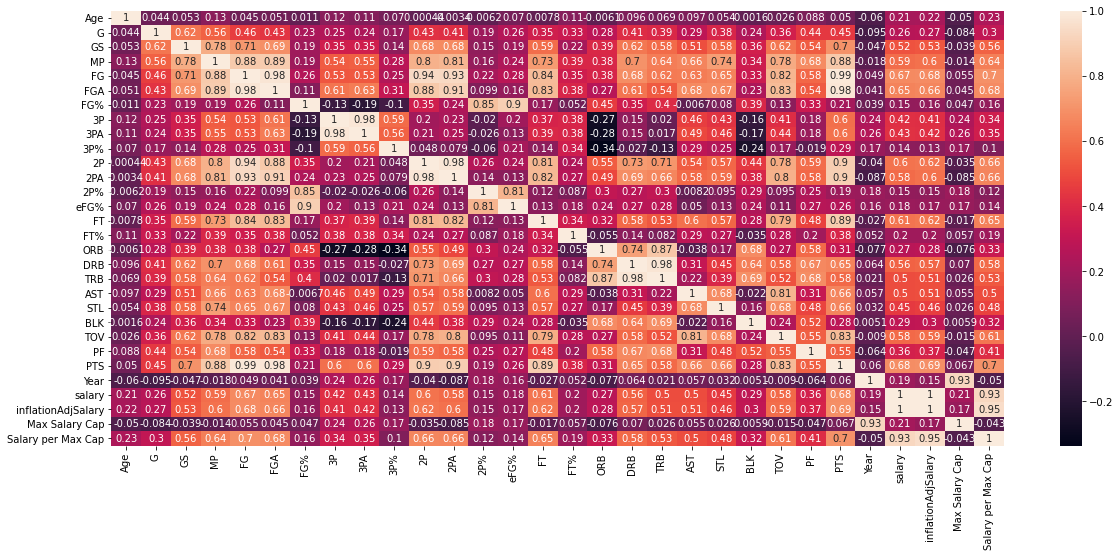

In [39]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

In [40]:
bio = pd.read_csv('player_data.csv')

In [41]:
bio.head()

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,June 24 1968,Duke
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,April 7 1946,Iowa State
2,Kareem Abdul-Jabbar*,1970,1989,C,7-2,225.0,April 16 1947,UCLA
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,March 9 1969,LSU
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,November 3 1974,Michigan San Jose State


In [42]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,salary,inflationAdjSalary,Max Salary Cap,Salary per Max Cap
0,Arron Afflalo,SG,22,DET,75,9,12.9,1.3,3.2,0.411,...,0.4,0.1,0.5,1.1,3.7,2008,1015440,1260841,58680000,0.017305
1,Maurice Ager,SG,23,TOT,26,3,6.3,0.8,2.5,0.323,...,0.0,0.0,0.2,0.7,2.0,2008,1042440,1294366,58680000,0.017765
2,Maurice Ager,SG,23,DAL,12,3,6.4,0.4,2.3,0.185,...,0.0,0.1,0.3,0.9,1.3,2008,1042440,1294366,58680000,0.017765
3,Maurice Ager,SG,23,NJN,14,0,6.3,1.1,2.7,0.421,...,0.0,0.0,0.2,0.4,2.6,2008,1042440,1294366,58680000,0.017765
4,Blake Ahearn,PG,23,MIA,12,0,14.8,1.3,4.8,0.263,...,0.5,0.0,1.3,1.7,5.8,2008,125562,155906,58680000,0.002140


In [43]:
bio['Pos'].unique()

array(['F-C', 'C-F', 'C', 'G', 'F', 'G-F', 'F-G'], dtype=object)

In [44]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'salary',
       'inflationAdjSalary', 'Max Salary Cap', 'Salary per Max Cap'],
      dtype='object')

In [45]:
data = pd.merge(df,bio,on='Player',how='inner')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              6225 non-null   object 
 1   Pos_x               6225 non-null   object 
 2   Age                 6225 non-null   int64  
 3   Tm                  6225 non-null   object 
 4   G                   6225 non-null   int64  
 5   GS                  6225 non-null   int64  
 6   MP                  6225 non-null   float64
 7   FG                  6225 non-null   float64
 8   FGA                 6225 non-null   float64
 9   FG%                 6225 non-null   float64
 10  3P                  6225 non-null   float64
 11  3PA                 6225 non-null   float64
 12  3P%                 6225 non-null   float64
 13  2P                  6225 non-null   float64
 14  2PA                 6225 non-null   float64
 15  2P%                 6225 non-null   float64
 16  eFG%  

In [47]:
data['Pos_x'].unique()

array(['SG', 'SF', 'PG', 'PF', 'C', 'PF-C', 'SF-SG', 'PF-SF', 'PG-SG',
       'C-PF', 'SG-SF', 'SG-PG', 'SF-PF', 'SG-PF', 'SF-C'], dtype=object)

In [48]:
data['Pos_pref'] = data['Pos_x'].apply(lambda x: x.split('-')[0])

In [49]:
data['Pos_pref'].unique()

array(['SG', 'SF', 'PG', 'PF', 'C'], dtype=object)

In [50]:
data.head()

,Player,Pos_x,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Max Salary Cap,Salary per Max Cap,From,To,Pos_y,Ht,Wt,Birth Date,Colleges,Pos_pref
0,Arron Afflalo,SG,22,DET,75,9,12.9,1.3,3.2,0.411,...,58680000,0.017305,2008,2018,G-F,6-5,210.0,October 15 1985,UCLA,SG
1,Arron Afflalo,SG,23,DET,74,8,16.7,1.8,4.1,0.437,...,57700000,0.018826,2008,2018,G-F,6-5,210.0,October 15 1985,UCLA,SG
2,Arron Afflalo,SG,24,DEN,82,75,27.1,3.3,7.1,0.465,...,58040000,0.033763,2008,2018,G-F,6-5,210.0,October 15 1985,UCLA,SG
3,Arron Afflalo,SG,25,DEN,69,69,33.7,4.5,9.1,0.498,...,58044000,0.130289,2008,2018,G-F,6-5,210.0,October 15 1985,UCLA,SG
4,Arron Afflalo,SG,26,DEN,62,62,33.6,5.3,11.3,0.471,...,58044000,0.130289,2008,2018,G-F,6-5,210.0,October 15 1985,UCLA,SG


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              6225 non-null   object 
 1   Pos_x               6225 non-null   object 
 2   Age                 6225 non-null   int64  
 3   Tm                  6225 non-null   object 
 4   G                   6225 non-null   int64  
 5   GS                  6225 non-null   int64  
 6   MP                  6225 non-null   float64
 7   FG                  6225 non-null   float64
 8   FGA                 6225 non-null   float64
 9   FG%                 6225 non-null   float64
 10  3P                  6225 non-null   float64
 11  3PA                 6225 non-null   float64
 12  3P%                 6225 non-null   float64
 13  2P                  6225 non-null   float64
 14  2PA                 6225 non-null   float64
 15  2P%                 6225 non-null   float64
 16  eFG%  

In [52]:
data['Ht'] = data['Ht'].apply(lambda h: float((int(h.split('-')[0]) * 12 + int(h.split('-')[1])) * 2.54 / 100))

In [53]:
data['Ht']

0       1.9558
1       1.9558
2       1.9558
3       1.9558
4       1.9558
         ...  
6220    1.9558
6221    2.0066
6222    1.9812
6223    1.8542
6224    2.1336
Name: Ht, Length: 6225, dtype: float64

In [54]:
data['Year_Play'] = data['Year'] - data['From']

In [55]:
data['Year_Play'] = data['Year_Play'] +1

In [56]:
data.head()

,Player,Pos_x,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Salary per Max Cap,From,To,Pos_y,Ht,Wt,Birth Date,Colleges,Pos_pref,Year_Play
0,Arron Afflalo,SG,22,DET,75,9,12.9,1.3,3.2,0.411,...,0.017305,2008,2018,G-F,1.9558,210.0,October 15 1985,UCLA,SG,1
1,Arron Afflalo,SG,23,DET,74,8,16.7,1.8,4.1,0.437,...,0.018826,2008,2018,G-F,1.9558,210.0,October 15 1985,UCLA,SG,2
2,Arron Afflalo,SG,24,DEN,82,75,27.1,3.3,7.1,0.465,...,0.033763,2008,2018,G-F,1.9558,210.0,October 15 1985,UCLA,SG,3
3,Arron Afflalo,SG,25,DEN,69,69,33.7,4.5,9.1,0.498,...,0.130289,2008,2018,G-F,1.9558,210.0,October 15 1985,UCLA,SG,4
4,Arron Afflalo,SG,26,DEN,62,62,33.6,5.3,11.3,0.471,...,0.130289,2008,2018,G-F,1.9558,210.0,October 15 1985,UCLA,SG,5


In [57]:
data.columns

Index(['Player', 'Pos_x', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'salary', 'inflationAdjSalary', 'Max Salary Cap', 'Salary per Max Cap',
       'From', 'To', 'Pos_y', 'Ht', 'Wt', 'Birth Date', 'Colleges', 'Pos_pref',
       'Year_Play'],
      dtype='object')

In [58]:
data['Year']

0       2008
1       2009
2       2010
3       2011
4       2012
        ... 
6220    2021
6221    2021
6222    2021
6223    2021
6224    2021
Name: Year, Length: 6225, dtype: int64

In [59]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url_template = "https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html"
years = range(2008, 2023) # 2007-2008 season to current season

df_list = []
for year in years:
    url = url_template.format(year=year)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find("table", {"id": "advanced_stats"})
    df = pd.read_html(str(table))[0]
    df['Year'] = year
    df_list.append(df)

all_data = pd.concat(df_list, axis=0, ignore_index=True)
all_data.to_csv("nba_advanced_stats.csv", index=False)


In [60]:
df = data.copy()

In [61]:
### Dropping Unuseful columns 
df.drop(columns = ['Pos_x','Pos_y','To','Birth Date'],inplace = True)

In [62]:
df

,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,salary,inflationAdjSalary,Max Salary Cap,Salary per Max Cap,From,Ht,Wt,Colleges,Pos_pref,Year_Play
0,Arron Afflalo,22,DET,75,9,12.9,1.3,3.2,0.411,0.1,...,1015440,1260841,58680000,0.017305,2008,1.9558,210.0,UCLA,SG,1
1,Arron Afflalo,23,DET,74,8,16.7,1.8,4.1,0.437,0.6,...,1086240,1368273,57700000,0.018826,2008,1.9558,210.0,UCLA,SG,2
2,Arron Afflalo,24,DEN,82,75,27.1,3.3,7.1,0.465,1.3,...,1959577,2442636,58040000,0.033763,2008,1.9558,210.0,UCLA,SG,3
3,Arron Afflalo,25,DEN,69,69,33.7,4.5,9.1,0.498,1.5,...,7562500,9102794,58044000,0.130289,2008,1.9558,210.0,UCLA,SG,4
4,Arron Afflalo,26,DEN,62,62,33.6,5.3,11.3,0.471,1.4,...,7562500,8953803,58044000,0.130289,2008,1.9558,210.0,UCLA,SG,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220,Devin Vassell,20,SAS,62,7,17.0,2.0,4.9,0.406,0.8,...,4235160,4618855,112414000,0.037675,2021,1.9558,200.0,Florida State,SF,1
6221,Patrick Williams,19,CHI,71,71,27.9,3.6,7.4,0.483,0.8,...,7422000,8094415,112414000,0.066024,2021,2.0066,215.0,Florida State,PF,1
6222,Dylan Windler,24,CLE,31,0,16.5,1.8,4.2,0.438,0.8,...,2239200,2442066,112414000,0.019919,2021,1.9812,196.0,Belmont,SF,1
6223,Cassius Winston,22,WAS,22,0,4.5,0.6,1.5,0.424,0.4,...,462629,504542,112414000,0.004115,2021,1.8542,185.0,Michigan State,PG,1


In [63]:
df.columns

Index(['Player', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'salary',
       'inflationAdjSalary', 'Max Salary Cap', 'Salary per Max Cap', 'From',
       'Ht', 'Wt', 'Colleges', 'Pos_pref', 'Year_Play'],
      dtype='object')

In [64]:
df[df['Colleges'].isna()]

,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,salary,inflationAdjSalary,Max Salary Cap,Salary per Max Cap,From,Ht,Wt,Colleges,Pos_pref,Year_Play
145,Leandro Barbosa,25,PHO,82,12,29.5,5.8,12.5,0.462,2.0,...,6100000,7574186,58680000,0.103954,2004,1.9050,194.0,NaN,SG,5
146,Leandro Barbosa,26,PHO,70,11,24.4,5.2,10.8,0.482,1.3,...,6600000,8313638,57700000,0.114385,2004,1.9050,194.0,NaN,SG,6
147,Leandro Barbosa,27,PHO,44,5,17.9,3.5,8.3,0.425,1.0,...,7100000,8850235,58040000,0.122329,2004,1.9050,194.0,NaN,PG,7
148,Leandro Barbosa,28,TOR,58,0,24.1,5.1,11.3,0.450,1.2,...,7600000,9147932,58044000,0.130935,2004,1.9050,194.0,NaN,SG,8
149,Leandro Barbosa,29,TOT,64,0,21.6,4.2,10.0,0.425,1.0,...,1229255,1455406,58044000,0.021178,2004,1.9050,194.0,NaN,SG,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160,Gabriel Deck,25,OKC,10,0,21.2,3.2,6.7,0.478,0.2,...,1690507,1843662,112414000,0.015038,2021,2.0320,232.0,NaN,PF,1
6171,Killian Hayes,19,DET,26,18,25.8,2.7,7.7,0.353,0.8,...,5572680,6077551,112414000,0.049573,2021,1.9558,195.0,NaN,PG,1
6183,Didi Louzada,21,NOP,3,0,18.7,1.0,4.3,0.231,0.7,...,1786878,1948764,112414000,0.015896,2021,1.9558,188.0,NaN,SF,1
6199,Aleksej Pokusevski,19,OKC,45,28,24.2,3.1,9.1,0.341,1.3,...,3113160,3395204,112414000,0.027694,2021,2.1336,190.0,NaN,PF,1


In [65]:
df["Colleges"].fillna(
    pd.Series(
        [
            "Skip-Colleges" if age < 19 else "Oversea Player"
            for age in df["Age"]
        ]
    ),
    inplace=True,
)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              6225 non-null   object 
 1   Age                 6225 non-null   int64  
 2   Tm                  6225 non-null   object 
 3   G                   6225 non-null   int64  
 4   GS                  6225 non-null   int64  
 5   MP                  6225 non-null   float64
 6   FG                  6225 non-null   float64
 7   FGA                 6225 non-null   float64
 8   FG%                 6225 non-null   float64
 9   3P                  6225 non-null   float64
 10  3PA                 6225 non-null   float64
 11  3P%                 6225 non-null   float64
 12  2P                  6225 non-null   float64
 13  2PA                 6225 non-null   float64
 14  2P%                 6225 non-null   float64
 15  eFG%                6225 non-null   float64
 16  FT    

In [67]:
nba_adv = pd.read_csv('nba_advanced_stats.csv')

In [68]:
nba_adv.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Year
0,1,Shareef Abdur-Rahim,PF,31,SAC,6,51,5.5,.317,.000,...,0.0,0.0,0.0,-0.005,NaN,-4.4,-2.5,-6.9,-0.1,2008
1,2,Arron Afflalo,SG,22,DET,75,970,10.2,.494,.199,...,0.5,1.4,1.9,.092,NaN,-2.6,1.0,-1.5,0.1,2008
2,3,Maurice Ager,SG,23,TOT,26,165,1.8,.363,.292,...,-0.4,0.0,-0.4,-0.114,NaN,-6.8,-4.2,-11.1,-0.4,2008
3,3,Maurice Ager,SG,23,DAL,12,77,-4.4,.253,.296,...,-0.3,0.0,-0.3,-0.181,NaN,-10.1,-3.6,-13.7,-0.2,2008
4,3,Maurice Ager,SG,23,NJN,14,88,7.1,.443,.289,...,-0.1,0.0,-0.1,-0.056,NaN,-4.0,-4.8,-8.7,-0.1,2008


In [69]:
nba_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9842 entries, 0 to 9841
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           9842 non-null   object 
 1   Player       9842 non-null   object 
 2   Pos          9842 non-null   object 
 3   Age          9842 non-null   object 
 4   Tm           9842 non-null   object 
 5   G            9842 non-null   object 
 6   MP           9842 non-null   object 
 7   PER          9839 non-null   object 
 8   TS%          9785 non-null   object 
 9   3PAr         9783 non-null   object 
 10  FTr          9783 non-null   object 
 11  ORB%         9839 non-null   object 
 12  DRB%         9839 non-null   object 
 13  TRB%         9839 non-null   object 
 14  AST%         9839 non-null   object 
 15  STL%         9839 non-null   object 
 16  BLK%         9839 non-null   object 
 17  TOV%         9792 non-null   object 
 18  USG%         9839 non-null   object 
 19  Unname

In [70]:
nba_adv.drop(columns=['Rk','Pos','Age','G','MP','Unnamed: 19','Unnamed: 24'],inplace = True)

In [71]:
nba_adv.head()

,Player,Tm,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,Shareef Abdur-Rahim,SAC,5.5,.317,.000,.286,14.2,9.1,11.6,11.1,...,14.7,0.0,0.0,0.0,-0.005,-4.4,-2.5,-6.9,-0.1,2008
1,Arron Afflalo,DET,10.2,.494,.199,.361,4.4,12.5,8.4,8.1,...,15.2,0.5,1.4,1.9,.092,-2.6,1.0,-1.5,0.1,2008
2,Maurice Ager,TOT,1.8,.363,.292,.185,2.8,6.3,4.6,8.0,...,21.3,-0.4,0.0,-0.4,-0.114,-6.8,-4.2,-11.1,-0.4,2008
3,Maurice Ager,DAL,-4.4,.253,.296,.222,1.6,4.4,3.0,7.4,...,19.8,-0.3,0.0,-0.3,-0.181,-10.1,-3.6,-13.7,-0.2,2008
4,Maurice Ager,NJN,7.1,.443,.289,.158,3.9,7.9,5.9,8.4,...,22.7,-0.1,0.0,-0.1,-0.056,-4.0,-4.8,-8.7,-0.1,2008


In [72]:
nba_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9842 entries, 0 to 9841
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  9842 non-null   object
 1   Tm      9842 non-null   object
 2   PER     9839 non-null   object
 3   TS%     9785 non-null   object
 4   3PAr    9783 non-null   object
 5   FTr     9783 non-null   object
 6   ORB%    9839 non-null   object
 7   DRB%    9839 non-null   object
 8   TRB%    9839 non-null   object
 9   AST%    9839 non-null   object
 10  STL%    9839 non-null   object
 11  BLK%    9839 non-null   object
 12  TOV%    9792 non-null   object
 13  USG%    9839 non-null   object
 14  OWS     9842 non-null   object
 15  DWS     9842 non-null   object
 16  WS      9842 non-null   object
 17  WS/48   9839 non-null   object
 18  OBPM    9842 non-null   object
 19  DBPM    9842 non-null   object
 20  BPM     9842 non-null   object
 21  VORP    9842 non-null   object
 22  Year    9842 non-null   

In [73]:
df = pd.merge(df,nba_adv , on = ['Player','Tm','Year'],how = 'inner')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              6225 non-null   object 
 1   Age                 6225 non-null   int64  
 2   Tm                  6225 non-null   object 
 3   G                   6225 non-null   int64  
 4   GS                  6225 non-null   int64  
 5   MP                  6225 non-null   float64
 6   FG                  6225 non-null   float64
 7   FGA                 6225 non-null   float64
 8   FG%                 6225 non-null   float64
 9   3P                  6225 non-null   float64
 10  3PA                 6225 non-null   float64
 11  3P%                 6225 non-null   float64
 12  2P                  6225 non-null   float64
 13  2PA                 6225 non-null   float64
 14  2P%                 6225 non-null   float64
 15  eFG%                6225 non-null   float64
 16  FT    

In [75]:
df['PER'] = df['PER'].astype(float)
df['TS%'] = df['TS%'].astype(float)
df['3PAr'] = df['3PAr'].astype(float)
df['FTr'] = df['FTr'].astype(float)
df['ORB%'] = df['ORB%'].astype(float)
df['DRB%'] = df['DRB%'].astype(float)
df['TRB%'] = df['TRB%'].astype(float)
df['AST%'] = df['AST%'].astype(float)
df['STL%'] = df['STL%'].astype(float)
df['BLK%'] = df['BLK%'].astype(float)
df['TOV%'] = df['TOV%'].astype(float)
df['USG%'] = df['USG%'].astype(float)
df['OWS'] = df['OWS'].astype(float)
df['DWS'] = df['DWS'].astype(float)
df['WS'] = df['WS'].astype(float)
df['WS/48'] = df['WS/48'].astype(float)
df['OBPM'] = df['OBPM'].astype(float)
df['DBPM'] = df['DBPM'].astype(float)
df['BPM'] = df['BPM'].astype(float)
df['VORP'] = df['VORP'].astype(float)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              6225 non-null   object 
 1   Age                 6225 non-null   int64  
 2   Tm                  6225 non-null   object 
 3   G                   6225 non-null   int64  
 4   GS                  6225 non-null   int64  
 5   MP                  6225 non-null   float64
 6   FG                  6225 non-null   float64
 7   FGA                 6225 non-null   float64
 8   FG%                 6225 non-null   float64
 9   3P                  6225 non-null   float64
 10  3PA                 6225 non-null   float64
 11  3P%                 6225 non-null   float64
 12  2P                  6225 non-null   float64
 13  2PA                 6225 non-null   float64
 14  2P%                 6225 non-null   float64
 15  eFG%                6225 non-null   float64
 16  FT    

In [77]:
df.fillna(0,inplace = True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              6225 non-null   object 
 1   Age                 6225 non-null   int64  
 2   Tm                  6225 non-null   object 
 3   G                   6225 non-null   int64  
 4   GS                  6225 non-null   int64  
 5   MP                  6225 non-null   float64
 6   FG                  6225 non-null   float64
 7   FGA                 6225 non-null   float64
 8   FG%                 6225 non-null   float64
 9   3P                  6225 non-null   float64
 10  3PA                 6225 non-null   float64
 11  3P%                 6225 non-null   float64
 12  2P                  6225 non-null   float64
 13  2PA                 6225 non-null   float64
 14  2P%                 6225 non-null   float64
 15  eFG%                6225 non-null   float64
 16  FT    

In [79]:
data = df.copy()

In [80]:
data

,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Arron Afflalo,22,DET,75,9,12.9,1.3,3.2,0.411,0.1,...,10.9,15.2,0.5,1.4,1.9,0.092,-2.6,1.0,-1.5,0.1
1,Arron Afflalo,23,DET,74,8,16.7,1.8,4.1,0.437,0.6,...,11.5,14.5,0.8,1.0,1.8,0.069,-2.8,0.2,-2.6,-0.2
2,Arron Afflalo,24,DEN,82,75,27.1,3.3,7.1,0.465,1.3,...,10.5,14.0,2.8,1.4,4.3,0.092,-0.2,-0.2,-0.4,0.9
3,Arron Afflalo,25,DEN,69,69,33.7,4.5,9.1,0.498,1.5,...,9.2,14.8,4.8,1.4,6.2,0.128,1.7,-0.3,1.4,2.0
4,Arron Afflalo,26,DEN,62,62,33.6,5.3,11.3,0.471,1.4,...,9.5,19.1,4.7,0.6,5.3,0.121,1.4,-1.2,0.1,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220,Devin Vassell,20,SAS,62,7,17.0,2.0,4.9,0.406,0.8,...,6.3,14.3,0.4,1.1,1.5,0.069,-2.2,0.7,-1.5,0.1
6221,Patrick Williams,19,CHI,71,71,27.9,3.6,7.4,0.483,0.8,...,14.4,14.9,0.3,2.2,2.5,0.060,-2.8,0.4,-2.4,-0.2
6222,Dylan Windler,24,CLE,31,0,16.5,1.8,4.2,0.438,0.8,...,18.4,14.8,0.0,0.5,0.5,0.045,-2.0,0.3,-1.7,0.0
6223,Cassius Winston,22,WAS,22,0,4.5,0.6,1.5,0.424,0.4,...,12.3,17.2,0.1,0.1,0.1,0.066,-2.1,-1.1,-3.2,0.0


In [81]:
data.columns

Index(['Player', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'salary',
       'inflationAdjSalary', 'Max Salary Cap', 'Salary per Max Cap', 'From',
       'Ht', 'Wt', 'Colleges', 'Pos_pref', 'Year_Play', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [82]:
df= data.copy()

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              6225 non-null   object 
 1   Age                 6225 non-null   int64  
 2   Tm                  6225 non-null   object 
 3   G                   6225 non-null   int64  
 4   GS                  6225 non-null   int64  
 5   MP                  6225 non-null   float64
 6   FG                  6225 non-null   float64
 7   FGA                 6225 non-null   float64
 8   FG%                 6225 non-null   float64
 9   3P                  6225 non-null   float64
 10  3PA                 6225 non-null   float64
 11  3P%                 6225 non-null   float64
 12  2P                  6225 non-null   float64
 13  2PA                 6225 non-null   float64
 14  2P%                 6225 non-null   float64
 15  eFG%                6225 non-null   float64
 16  FT    

In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

def predict_salary(df):
    # Prepare the data
    X = df[['Age', 'G', 'GS', 'MP', 'FG%', '3P', '3P%', '2P', '2P%', 'eFG%', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','Ht', 'Wt', 'Year_Play', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM','VORP','Year']]
    y = df['salary']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train the models
    models = [
        LinearRegression(),
        KNeighborsRegressor(),
        DecisionTreeRegressor(),
        RandomForestRegressor(n_estimators=100, random_state=42),
        GradientBoostingRegressor(random_state=42)
    ]
    model_names = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
    for i, model in enumerate(models):
        cv_scores = cross_val_score(model, X_scaled, y, cv=10, scoring='r2')
        print(f"{model_names[i]}: mean R2 score = {cv_scores.mean():.2f} (std = {cv_scores.std():.2f})")

    # Select the best model and make predictions on the full dataset
    best_model_idx = models.index(max(models, key=lambda m: cross_val_score(m, X_scaled, y, cv=10, scoring='r2').mean()))
    best_model = models[best_model_idx]
    best_model.fit(X_scaled, y)
    y_pred_full = best_model.predict(X_scaled)

    # Add predicted salary to the dataframe
    df['Predicted_Salary'] = y_pred_full

    # Return dataframe with predicted salary, actual salary, player's stats, and player's name
    return df[['Player','Ht', 'Wt', 'Age','Pos_pref','Colleges','Year_Play', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM','VORP','Year', 'salary', 'Predicted_Salary','inflationAdjSalary','Max Salary Cap']]


In [85]:
predict_salary(df)

Linear Regression: mean R2 score = 0.49 (std = 0.29)
KNN: mean R2 score = 0.47 (std = 0.21)
Decision Tree: mean R2 score = 0.27 (std = 0.20)
Random Forest: mean R2 score = 0.64 (std = 0.10)
Gradient Boosting: mean R2 score = 0.63 (std = 0.16)


,Player,Ht,Wt,Age,Pos_pref,Colleges,Year_Play,Tm,G,GS,...,WS/48,OBPM,DBPM,BPM,VORP,Year,salary,Predicted_Salary,inflationAdjSalary,Max Salary Cap
0,Arron Afflalo,1.9558,210.0,22,SG,UCLA,1,DET,75,9,...,0.092,-2.6,1.0,-1.5,0.1,2008,1015440,1170556.88,1260841,58680000
1,Arron Afflalo,1.9558,210.0,23,SG,UCLA,2,DET,74,8,...,0.069,-2.8,0.2,-2.6,-0.2,2009,1086240,1306202.28,1368273,57700000
2,Arron Afflalo,1.9558,210.0,24,SG,UCLA,3,DEN,82,75,...,0.092,-0.2,-0.2,-0.4,0.9,2010,1959577,3754399.65,2442636,58040000
3,Arron Afflalo,1.9558,210.0,25,SG,UCLA,4,DEN,69,69,...,0.128,1.7,-0.3,1.4,2.0,2011,7562500,7208737.54,9102794,58044000
4,Arron Afflalo,1.9558,210.0,26,SG,UCLA,5,DEN,62,62,...,0.121,1.4,-1.2,0.1,1.1,2012,7562500,7628156.21,8953803,58044000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220,Devin Vassell,1.9558,200.0,20,SF,Florida State,1,SAS,62,7,...,0.069,-2.2,0.7,-1.5,0.1,2021,4235160,3665451.68,4618855,112414000
6221,Patrick Williams,2.0066,215.0,19,PF,Florida State,1,CHI,71,71,...,0.060,-2.8,0.4,-2.4,-0.2,2021,7422000,5590864.70,8094415,112414000
6222,Dylan Windler,1.9812,196.0,24,SF,Belmont,1,CLE,31,0,...,0.045,-2.0,0.3,-1.7,0.0,2021,2239200,2130593.52,2442066,112414000
6223,Cassius Winston,1.8542,185.0,22,PG,Michigan State,1,WAS,22,0,...,0.066,-2.1,-1.1,-3.2,0.0,2021,462629,556877.13,504542,112414000


In [86]:
d = predict_salary(df)

Linear Regression: mean R2 score = 0.49 (std = 0.29)
KNN: mean R2 score = 0.47 (std = 0.21)
Decision Tree: mean R2 score = 0.26 (std = 0.23)
Random Forest: mean R2 score = 0.64 (std = 0.10)
Gradient Boosting: mean R2 score = 0.63 (std = 0.16)


In [87]:
d

,Player,Ht,Wt,Age,Pos_pref,Colleges,Year_Play,Tm,G,GS,...,WS/48,OBPM,DBPM,BPM,VORP,Year,salary,Predicted_Salary,inflationAdjSalary,Max Salary Cap
0,Arron Afflalo,1.9558,210.0,22,SG,UCLA,1,DET,75,9,...,0.092,-2.6,1.0,-1.5,0.1,2008,1015440,1170556.88,1260841,58680000
1,Arron Afflalo,1.9558,210.0,23,SG,UCLA,2,DET,74,8,...,0.069,-2.8,0.2,-2.6,-0.2,2009,1086240,1306202.28,1368273,57700000
2,Arron Afflalo,1.9558,210.0,24,SG,UCLA,3,DEN,82,75,...,0.092,-0.2,-0.2,-0.4,0.9,2010,1959577,3754399.65,2442636,58040000
3,Arron Afflalo,1.9558,210.0,25,SG,UCLA,4,DEN,69,69,...,0.128,1.7,-0.3,1.4,2.0,2011,7562500,7208737.54,9102794,58044000
4,Arron Afflalo,1.9558,210.0,26,SG,UCLA,5,DEN,62,62,...,0.121,1.4,-1.2,0.1,1.1,2012,7562500,7628156.21,8953803,58044000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220,Devin Vassell,1.9558,200.0,20,SF,Florida State,1,SAS,62,7,...,0.069,-2.2,0.7,-1.5,0.1,2021,4235160,3665451.68,4618855,112414000
6221,Patrick Williams,2.0066,215.0,19,PF,Florida State,1,CHI,71,71,...,0.060,-2.8,0.4,-2.4,-0.2,2021,7422000,5590864.70,8094415,112414000
6222,Dylan Windler,1.9812,196.0,24,SF,Belmont,1,CLE,31,0,...,0.045,-2.0,0.3,-1.7,0.0,2021,2239200,2130593.52,2442066,112414000
6223,Cassius Winston,1.8542,185.0,22,PG,Michigan State,1,WAS,22,0,...,0.066,-2.1,-1.1,-3.2,0.0,2021,462629,556877.13,504542,112414000


In [88]:
d.to_csv('Nba.csv')

In [89]:
d.to_excel('Nba.xlsx')

In [90]:
d.shape

(6225, 58)